In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import polars.selectors as cs
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import datetime as dt
import numpy as np
import pandas as pd
from future.backports.email.feedparser import headerRE
from imblearn.over_sampling import SMOTE

In [10]:
df_path = r"F:\Datasets\CSV datasets\Bank_Transaction_Fraud_Detection.csv"

In [11]:
df = pl.read_csv(df_path, try_parse_dates=True)

In [12]:
df = df.with_columns(
    pl.col('Account_Balance') * 0.011007299,
    pl.col('Transaction_Amount') * 0.011007299,
)

In [13]:
df = df.drop(
    'Customer_ID', 'Transaction_ID', 'Customer_Contact', 'Customer_Email',
    'Transaction_Currency', 'Transaction_Currency', 'Merchant_ID',
    'Customer_Name'
)

In [14]:
df['State'].value_counts()

State,count
str,u32
"""Nagaland""",6031
"""Punjab""",5912
"""Telangana""",5952
"""Kerala""",5933
"""Manipur""",5869
…,…
"""Haryana""",5947
"""Sikkim""",5793
"""Meghalaya""",6003


In [15]:
df.select('*')

Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
str,i64,str,str,str,str,date,time,f64,str,str,f64,str,str,str,i64,str
"""Male""",60,"""Kerala""","""Thiruvananthapuram""","""Thiruvananthapuram Branch""","""Savings""",2025-01-23,16:04:07,356.80655,"""Transfer""","""Restaurant""",820.674164,"""Voice Assistant""","""Thiruvananthapuram, Kerala""","""POS""",0,"""Bitcoin transaction"""
"""Female""",51,"""Maharashtra""","""Nashik""","""Nashik Branch""","""Business""",2025-01-11,17:14:53,480.167001,"""Bill Payment""","""Restaurant""",821.393931,"""POS Mobile Device""","""Nashik, Maharashtra""","""Desktop""",0,"""Grocery delivery"""
"""Male""",20,"""Bihar""","""Bhagalpur""","""Bhagalpur Branch""","""Savings""",2025-01-25,03:09:52,694.148454,"""Bill Payment""","""Groceries""",735.485595,"""ATM""","""Bhagalpur, Bihar""","""Desktop""",0,"""Mutual fund investment"""
"""Female""",57,"""Tamil Nadu""","""Chennai""","""Chennai Branch""","""Business""",2025-01-19,12:27:02,154.110111,"""Debit""","""Entertainment""",640.372515,"""POS Mobile App""","""Chennai, Tamil Nadu""","""Mobile""",0,"""Food delivery"""
"""Female""",43,"""Punjab""","""Amritsar""","""Amritsar Branch""","""Savings""",2025-01-30,18:30:46,201.820588,"""Transfer""","""Entertainment""",177.311736,"""Virtual Card""","""Amritsar, Punjab""","""Mobile""",0,"""Debt repayment"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Female""",55,"""Dadra and Nagar Haveli and Dam…","""Diu""","""Diu Branch""","""Business""",2025-01-08,18:42:09,1084.370192,"""Credit""","""Restaurant""",412.499741,"""Desktop/Laptop""","""Diu, Dadra and Nagar Haveli an…","""ATM""",0,"""ATM withdrawal"""
"""Male""",51,"""Manipur""","""Kangpokpi""","""Kangpokpi Branch""","""Business""",2025-01-01,20:51:21,446.825342,"""Withdrawal""","""Groceries""",583.796319,"""ATM""","""Kangpokpi, Manipur""","""ATM""",0,"""Subscription box"""
"""Female""",41,"""Chandigarh""","""Chandigarh""","""Chandigarh Branch""","""Savings""",2025-01-28,10:47:40,677.82617,"""Withdrawal""","""Health""",1059.181309,"""ATM""","""Chandigarh, Chandigarh""","""Desktop""",0,"""Charity donation"""


In [16]:
pl.DataFrame({
    "column": df.columns,
    "unique_count": [df[col].n_unique() for col in df.columns]
})

column,unique_count
str,i64
"""Gender""",2
"""Age""",53
"""State""",34
"""City""",145
"""Bank_Branch""",145
…,…
"""Transaction_Device""",20
"""Transaction_Location""",148
"""Device_Type""",4


In [17]:
df = df.with_columns(
    pl.col('Transaction_Date').dt.year().alias('Year'),
    pl.col('Transaction_Date').dt.month().alias('Month'),
    pl.col('Transaction_Date').dt.day().alias('Day'),
    pl.col('Transaction_Time').dt.hour().alias('Hour'),
    pl.col('Transaction_Time').dt.minute().alias('Minute'),
    pl.col('Transaction_Time').dt.second().alias('Second'),
)

In [18]:
df = df.drop(
    'Transaction_Date', 'Transaction_Time'
)

In [19]:
df

Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Year,Month,Day,Hour,Minute,Second
str,i64,str,str,str,str,f64,str,str,f64,str,str,str,i64,str,i32,i8,i8,i8,i8,i8
"""Male""",60,"""Kerala""","""Thiruvananthapuram""","""Thiruvananthapuram Branch""","""Savings""",356.80655,"""Transfer""","""Restaurant""",820.674164,"""Voice Assistant""","""Thiruvananthapuram, Kerala""","""POS""",0,"""Bitcoin transaction""",2025,1,23,16,4,7
"""Female""",51,"""Maharashtra""","""Nashik""","""Nashik Branch""","""Business""",480.167001,"""Bill Payment""","""Restaurant""",821.393931,"""POS Mobile Device""","""Nashik, Maharashtra""","""Desktop""",0,"""Grocery delivery""",2025,1,11,17,14,53
"""Male""",20,"""Bihar""","""Bhagalpur""","""Bhagalpur Branch""","""Savings""",694.148454,"""Bill Payment""","""Groceries""",735.485595,"""ATM""","""Bhagalpur, Bihar""","""Desktop""",0,"""Mutual fund investment""",2025,1,25,3,9,52
"""Female""",57,"""Tamil Nadu""","""Chennai""","""Chennai Branch""","""Business""",154.110111,"""Debit""","""Entertainment""",640.372515,"""POS Mobile App""","""Chennai, Tamil Nadu""","""Mobile""",0,"""Food delivery""",2025,1,19,12,27,2
"""Female""",43,"""Punjab""","""Amritsar""","""Amritsar Branch""","""Savings""",201.820588,"""Transfer""","""Entertainment""",177.311736,"""Virtual Card""","""Amritsar, Punjab""","""Mobile""",0,"""Debt repayment""",2025,1,30,18,30,46
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Female""",55,"""Dadra and Nagar Haveli and Dam…","""Diu""","""Diu Branch""","""Business""",1084.370192,"""Credit""","""Restaurant""",412.499741,"""Desktop/Laptop""","""Diu, Dadra and Nagar Haveli an…","""ATM""",0,"""ATM withdrawal""",2025,1,8,18,42,9
"""Male""",51,"""Manipur""","""Kangpokpi""","""Kangpokpi Branch""","""Business""",446.825342,"""Withdrawal""","""Groceries""",583.796319,"""ATM""","""Kangpokpi, Manipur""","""ATM""",0,"""Subscription box""",2025,1,1,20,51,21
"""Female""",41,"""Chandigarh""","""Chandigarh""","""Chandigarh Branch""","""Savings""",677.82617,"""Withdrawal""","""Health""",1059.181309,"""ATM""","""Chandigarh, Chandigarh""","""Desktop""",0,"""Charity donation""",2025,1,28,10,47,40


In [20]:
X = df.select(cs.exclude('Is_Fraud'))

In [21]:
y = df.get_column('Is_Fraud')

In [22]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

In [23]:
# X.select(cs.string()).columns

['Gender',
 'State',
 'City',
 'Bank_Branch',
 'Account_Type',
 'Transaction_Type',
 'Merchant_Category',
 'Transaction_Device',
 'Transaction_Location',
 'Device_Type',
 'Transaction_Description']

In [24]:
# X.select(cs.numeric()).columns

['Age',
 'Transaction_Amount',
 'Account_Balance',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Second']

In [25]:
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('encoder', OneHotEncoder(
#             handle_unknown='ignore', sparse_output=False, drop='first'),
#         X.select(cs.string()).columns),
#         ('passthrough', 'passthrough', X.select(cs.numeric()).columns)
#     ])

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.feature_extraction import FeatureHasher

In [155]:
def prepare_for_hashing(df, categorical_cols):
    df_copy = df.clone()
    for col in categorical_cols:
        df_copy = df_copy.with_columns(pl.col(col).cast(pl.Utf8).alias(col))
    result = df_copy.select(categorical_cols).to_numpy().tolist()

    return [[str(item) for item in row] for row in result]

In [156]:
categorical_cols = X_train.select(cs.string()).columns
numerical_cols = X_train.select(cs.numeric()).columns

In [157]:
X_train_list = prepare_for_hashing(X_train, categorical_cols)
X_test_list = prepare_for_hashing(X_test, categorical_cols)

In [159]:
hasher = FeatureHasher(n_features=182, input_type='string')
X_train_hashed = hasher.fit_transform(X_train_list)
X_test_hashed = hasher.transform(X_test_list)

In [161]:
smote = SMOTE(random_state=42)

In [162]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_hashed, y_train)

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_hashed)

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
logistic_reg = LogisticRegression(solver='saga', max_iter=1000)

In [168]:
# param_grid = [
#     {
#         'penalty': ['l1', 'l2'],
#         'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#         'class_weight': [None, 'balanced']
#     },
#     {
#         'penalty': ['elasticnet'],
#         'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#         'l1_ratio': [0.25, 0.5, 0.75],
#         'class_weight': [None, 'balanced']
#     },
#     {
#         'penalty': ['none'],
#         'class_weight': [None, 'balanced']
#     }
# ]

param_grid = {
    'C': 0.1,
    'class_weight': None,
    'l1_ratio': 0.5,
    'penalty': 'elasticnet',
    'solver': 'saga'
}

In [169]:
grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=10,
    scoring='f1_macro'  # Use f1_macro for imbalanced data
)

In [170]:
param_grid_cv.fit(X_train_scaled, y_train_resampled)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             verbose=3)

In [171]:
param_grid_cv.best_params_

{'C': 0.1,
 'class_weight': None,
 'l1_ratio': 0.5,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [172]:
param_grid_cv.best_score_

np.float64(0.5310581269451048)

In [173]:
param_grid_cv.best_estimator_

LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [174]:
y_pred = param_grid_cv.predict(X_test_scaled)

In [199]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

In [176]:
accuracy_score(y_test, y_pred)

0.516375

In [177]:
f1_score(y_test, y_pred)

0.08977556109725686

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.52      0.67     37955
           1       0.05      0.47      0.09      2045

    accuracy                           0.52     40000
   macro avg       0.50      0.49      0.38     40000
weighted avg       0.90      0.52      0.64     40000



In [201]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[19701, 18254],
       [ 1091,   954]])

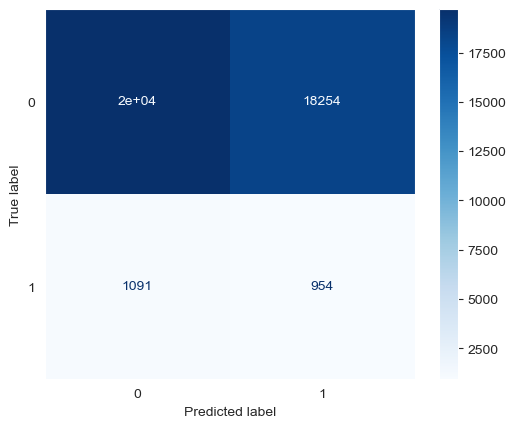

In [190]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues').ax_.grid(False)

In [204]:
result = pl.DataFrame({
    'Model': [
        'Accuracy Score',
        'F1 Score',
        'True Negative',
        'False Negative',
        'False Positive',
        'True Positive'
    ],
    'Logistic Regression CV': [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        conf_matrix[0, 0],
        conf_matrix[0, 1],
        conf_matrix[1, 0],
        conf_matrix[1, 1]],
})

In [205]:
result

Model,Logistic Regression CV
str,f64
"""Accuracy Score""",0.516375
"""F1 Score""",0.089776
"""True Negative""",19701.0
"""False Negative""",18254.0
"""False Positive""",1091.0
"""True Positive""",954.0


AttributeError: cannot get attribute show from great_tables (C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\great_tables\__init__.py)